In [21]:
# import Library yang dibutuhkan
import pandas as pd                   #dataframe manipulation
import numpy as np                    #scientific camputing
import seaborn as sns                 #visualization
import matplotlib.pyplot as plt       #visualization
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')


# Tables yang akan digunakan
'''
name.basics.tsv.gz
title.basics.tsv.gz
title.crew.tsv.gz
title.episode.tsv.gz
title.ratings.tsv.gz
'''

# Load all the TSV file into a DataFrame
#df = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/name.basics.tsv", sep='\t', na_values="\\N") 
df = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.basics.tsv", sep='\t', na_values="\\N") #formatting penulisan NaN
#title_crew = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.crew.tsv", sep='\t')
#title_episode = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.episode.tsv", sep='\t')
#title_ratings = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.ratings.tsv", sep='\t')

# Display the first 5 rows
df.head()
#title_basics.head()
#title_crew.head()
#title_episode.head()
#title_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,"Comedy,Short"


In [23]:
'''Data Wrangling'''

# Cek tipe data
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult           float64
startYear         float64
endYear           float64
runtimeMinutes     object
genres             object
dtype: object

In [27]:
# Untuk melihat nilai unik tiap kolom
df["titleType"].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [29]:
# Untuk melihat nilai unik tiap kolom
df["isAdult"].unique()

array([0.000e+00, 1.000e+00, 2.019e+03, 1.981e+03, 2.020e+03, 2.017e+03,
             nan, 2.023e+03, 2.022e+03, 2.011e+03, 2.016e+03, 2.015e+03,
       2.014e+03, 2.013e+03, 2.012e+03, 2.018e+03, 2.021e+03, 1.979e+03,
       1.980e+03, 1.982e+03, 1.983e+03, 1.984e+03, 1.987e+03, 1.985e+03,
       1.986e+03, 1.977e+03, 1.978e+03, 1.966e+03, 1.970e+03, 1.971e+03,
       1.972e+03, 1.973e+03, 1.974e+03, 1.975e+03, 1.988e+03, 1.976e+03,
       1.968e+03, 1.969e+03, 1.964e+03, 1.967e+03, 2.024e+03, 2.005e+03])

In [ ]:
'''Membingungkan karena ada 0 = bukan adult, 1 = adult, dan angka2 tahun = ga make sense, jadi kita akan hapus aja kolom ini'''

In [31]:
# Untuk melihat nilai unik tiap kolom
df["runtimeMinutes"].unique()

array([1.0, 5.0, 12.0, ..., '795', '3600', '2088'], dtype=object)

In [33]:
# Untuk melihat nilai unik tiap kolom
df["genres"].unique()

array(['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance',
       ..., 'Biography,Crime,Music', 'Mystery,Reality-TV,Thriller',
       'Musical,Reality-TV,Talk-Show'], dtype=object)

In [ ]:
'''nanti bisa di pisahin dari komanya, biar genrenya terpisahkan'''

In [35]:
# Hapus kolom yang tidak digunakan
df = df.drop(['endYear', 'originalTitle', 'isAdult'], axis=1)

In [37]:
df.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,1894.0,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,1892.0,5.0,"Animation,Short"
2,tt0000003,short,Poor Pierrot,1892.0,5.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,1892.0,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,1893.0,1.0,"Comedy,Short"


In [39]:
# Rename kolom
df = df.rename(columns = {"tconst" : "movieID", 
                          "titleType" : "type",
                         "primaryTitle" : "movieName",
                         "startYear" : "year",
                         "runtimeMinutes" : "duration"})

df.head()

,movieID,type,movieName,year,duration,genres
0,tt0000001,short,Carmencita,1894.0,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,1892.0,5.0,"Animation,Short"
2,tt0000003,short,Poor Pierrot,1892.0,5.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,1892.0,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,1893.0,1.0,"Comedy,Short"


In [41]:
# Cek duplicates
df.shape

(11278847, 6)

In [43]:
# Menunjukkan Duplicates
df[df.duplicated()]

,movieID,type,movieName,year,duration,genres


In [ ]:
'''known from above there's no duplicates'''

# Menghitung jumlah baris tiap kolom
#df.count()

# Membuang baris duplikat
#df.drop_duplicates()

In [45]:
# Cek Missing Values
print(df.isnull().sum())

movieID            0
type               0
movieName         19
year         1417203
duration     7715219
genres        500750
dtype: int64


In [47]:
'''Ternyata ada missing value di nama, kita akan hapus'''

df = df.dropna()
df.count()

movieID      3256570
type         3256570
movieName    3256570
year         3256570
duration     3256570
genres       3256570
dtype: int64

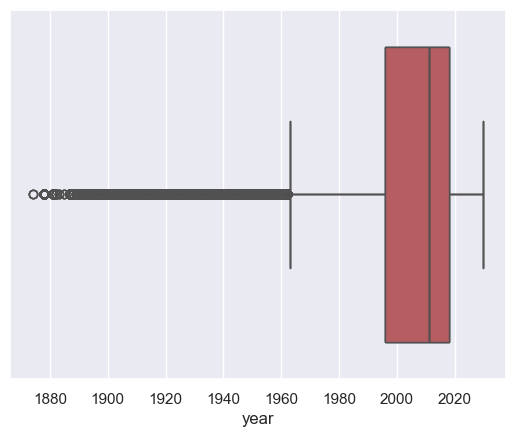

In [65]:
# Cek outlier dg boxplot
sns.boxplot(x=df['year'])

plt.show()


In [69]:
df['year'] = df['year'].astype(int)
print(df['year'].describe())

count    3.256570e+06
mean     2.003228e+03
std      2.069917e+01
min      1.874000e+03
25%      1.996000e+03
50%      2.011000e+03
75%      2.018000e+03
max      2.030000e+03
Name: year, dtype: float64


In [73]:
# Mengelim outlier dengan IQR
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [ ]:
# Filter dataframe tanpa outlier
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR) )). any(axis=1)]
df.shape

In [77]:
'''range tahun dibatasi 1960 - 2030'''
df = df[(df['year'] >= 1960) & (df['year'] <= 2030)]
df.shape

(3107824, 6)

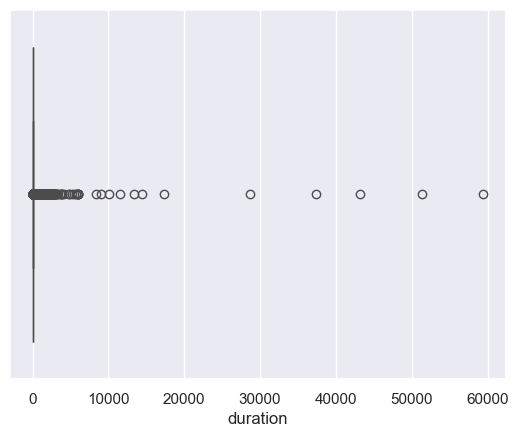

In [81]:
# Cek outlier dg boxplot
sns.boxplot(x=df['duration'])

plt.show()

In [87]:
df['duration'] = df['duration'].astype(int)
df['duration'].describe()

count    3.107824e+06
mean     4.319017e+01
std      7.433655e+01
min      0.000000e+00
25%      1.800000e+01
50%      3.000000e+01
75%      6.000000e+01
max      5.946000e+04
Name: duration, dtype: float64

In [91]:
'''range durasi dibatasi 0 - 3000'''
df = df[(df['duration'] <= 3000)]
df.shape

(3107791, 6)

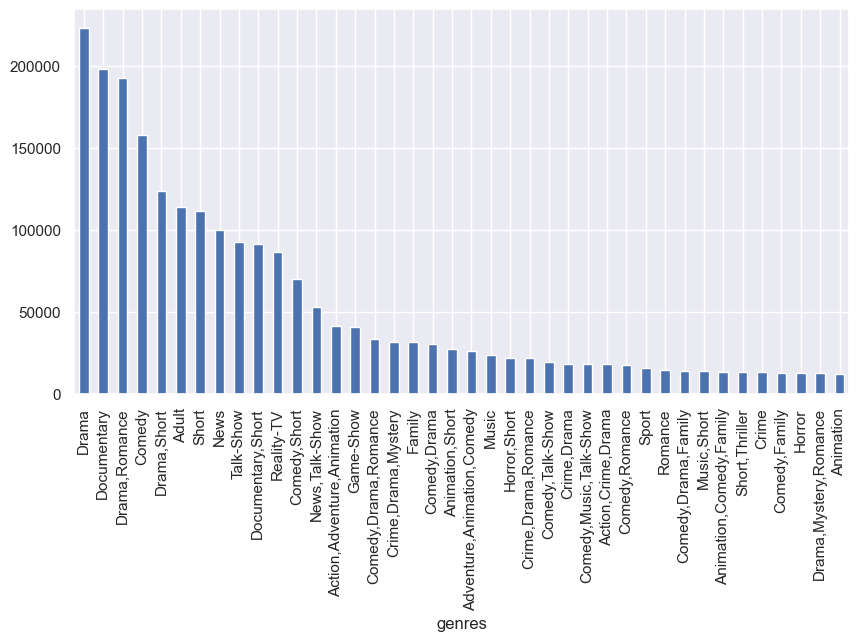

In [93]:
'''Exploratory by Visualization'''

# Histogram
df.genres.value_counts().nlargest(40).plot(kind='bar', figsize =(10,5))
#plt.title()
#plt.ylabel
#plt.xlabel('
plt.show()

In [97]:
# Heat Map

'''ada float dan string gabisa'''
#plt.figure(figsize=(10,5))
#c = df.corr()
#sns.heatmap(c, "BrBG", annot=True)
#c

'ada float dan string gabisa'

<Figure size 1000x500 with 0 Axes>

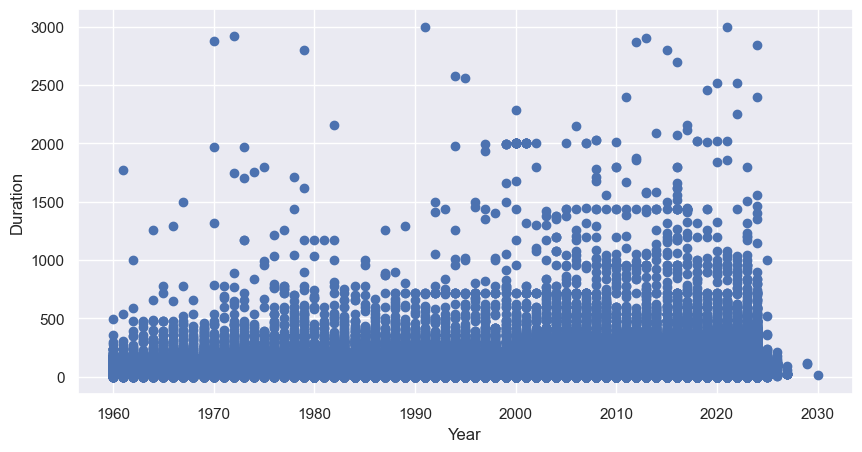

In [99]:
# Scatter plot

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['year'], df['duration'])
ax.set_xlabel('Year')
ax.set_ylabel('Duration')
plt.show()

In [ ]:
# Grouping

df.select_dtypes(include=[object])
df.select_dtypes(exclude=[object])

In [ ]:
# Data Distribution

data_num_columns = df.select_types(exclude=object)

x = plt.figure(figsize = (10,5))

for i, j in enumerate(data_num_columns)::
    x.add_subplot(3, 2, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

In [ ]:
for i, j in enumerate(data_num_columns):
    print (i,j)

In [103]:
'''Export Dataframe'''

# Export into CSV
df.to_csv("C:/Users/HP/Desktop/Data IMDb/title.basics.csv", index=False)